# Problem 5

## Problem 5.1

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np
from torch.utils.data.dataset import random_split
from torchvision import datasets
from sklearn.metrics import confusion_matrix
import PIL

In [2]:
##Do Not Touch This Cell

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 8, 5)
        self.conv2 = nn.Conv2d(8, 16, 3)
        self.bn1 = nn.BatchNorm2d(8)
        self.bn2 = nn.BatchNorm2d(16)
        self.fc1 = nn.Linear(16*6*6, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        out = F.relu(self.bn1(self.conv1(x)))
        out = F.max_pool2d(out, 2)
        out = F.relu(self.bn2(self.conv2(out)))
        out = F.max_pool2d(out, 2)
        out = out.view(out.size(0), -1)
        out = F.relu(self.fc1(out))
        out = F.relu(self.fc2(out))
        out = self.fc3(out)
        return out

In [3]:
##Do Not Touch This Cell

device = 'cuda' if torch.cuda.is_available() else 'cpu'
net = Net().to(device)
optimizer = optim.SGD(net.parameters(), lr=0.01, momentum=0.5)
if device =='cuda':
    print("Train on GPU...")
else:
    print("Train on CPU...")

Train on GPU...


In [4]:
##Do Not Touch This Cell
max_epochs = 50

random_seed = 671
torch.manual_seed(random_seed)

In [7]:
train_transform = transforms.Compose(
     [transforms.ToTensor(),
     transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010))])

test_transform = transforms.Compose(
     [transforms.ToTensor(),
     transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010))])

dataset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=train_transform)
##TODO: Split the set into 80% train, 20% validation (there are 50K total images)
train_num = int(40e3)
val_num = int(10e3)
train_set, val_set = random_split(dataset, [train_num, val_num])

train_loader = torch.utils.data.DataLoader(train_set, batch_size=128, shuffle=True)
val_loader = torch.utils.data.DataLoader(val_set, batch_size=128, shuffle=False)

test_set = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=test_transform)
test_loader = torch.utils.data.DataLoader(test_set, batch_size=1, shuffle=False)

classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

Files already downloaded and verified
Files already downloaded and verified


In [11]:
loss_list, acc_list = [], []
loss_list_val, acc_list_val = [], []
criterion = nn.CrossEntropyLoss()

for epoch in range(max_epochs):
    #TODO: set the net to train mode:
    net.train()

    epoch_loss = 0.0
    correct = 0
    for batch_idx, (data, labels) in enumerate(train_loader):
        data, labels = data.to(device), labels.to(device)

        optimizer.zero_grad()
        ##TODO: pass the data into the network and store the output
        outputs = net(data)

        ##TODO: Calculate the cross entropy loss between the output and target 
        loss = criterion(outputs,labels)
  
        ##TODO: Perform backpropagation
        loss.backward()
        optimizer.step()

        ##TODO: Get the prediction from the output
        _,predicted = torch.max(outputs,1)

        ##TODO: Calculate the correct number and add the number to correct
        correct += (predicted == labels).sum().item()

        ##TODO: Add the loss to epoch_loss.
        epoch_loss += loss.item()

    ##TODO: calculate the average loss
    avg_loss = epoch_loss / len(train_loader)

    ##TODO: calculate the average accuracy
    avg_acc = correct / train_num
    

    ##TODO: append average epoch loss to loss list
    loss_list.append(avg_loss)

    ##TODO: append average accuracy to accuracy list
    acc_list.append(avg_acc)
    
    # validation
    ##TODO: set the model to eval mode
    net.eval()

    with torch.no_grad():
        loss_val = 0.0
        correct_val = 0
        for batch_idx, (data, labels) in enumerate(val_loader):
            data, labels = data.to(device), labels.to(device)
            ##TODO: pass the data into the network and store the output
            outputs = net(data)

            ##TODO: Calculate the cross entropy loss between the output and target 
            loss = criterion(outputs,labels)

            ##TODO: Get the prediction from the output
            _,predicted = torch.max(outputs,1)

            ##TODO: Calculate the correct number and add the number to correct_val
            correct_val += (predicted == labels).sum().item()

            ##TODO: Add the loss to loss_val
            loss_val = loss.item()

        ##TODO: calculate the average loss of validation
        avg_loss_val = loss_val/len(val_loader)

        ##TODO: calculate the average accuracy of validation
        avg_acc_val = correct_val/val_num

        ##TODO: append average epoch loss to loss list of validation
        loss_list_val.append(avg_loss_val)

        ##TODO: append average accuracy to accuracy list of validation
        acc_list_val.append(avg_acc_val)

    print('[epoch %d] loss: %.5f accuracy: %.4f val loss: %.5f val accuracy: %.4f' % (epoch + 1, avg_loss, avg_acc, avg_loss_val, avg_acc_val))

[epoch 1] loss: 0.69313 accuracy: 0.7575 val loss: 0.02030 val accuracy: 0.6771
[epoch 2] loss: 0.67881 accuracy: 0.7624 val loss: 0.01914 val accuracy: 0.6758
[epoch 3] loss: 0.66187 accuracy: 0.7671 val loss: 0.01557 val accuracy: 0.6866
[epoch 4] loss: 0.64433 accuracy: 0.7743 val loss: 0.02032 val accuracy: 0.6720
[epoch 5] loss: 0.62643 accuracy: 0.7791 val loss: 0.01711 val accuracy: 0.6871
[epoch 6] loss: 0.61180 accuracy: 0.7855 val loss: 0.01588 val accuracy: 0.6713
[epoch 7] loss: 0.59400 accuracy: 0.7917 val loss: 0.01722 val accuracy: 0.6668
[epoch 8] loss: 0.58561 accuracy: 0.7946 val loss: 0.01814 val accuracy: 0.6883
[epoch 9] loss: 0.56668 accuracy: 0.8007 val loss: 0.02446 val accuracy: 0.6816
[epoch 10] loss: 0.55102 accuracy: 0.8059 val loss: 0.01401 val accuracy: 0.6666
[epoch 11] loss: 0.53541 accuracy: 0.8118 val loss: 0.02055 val accuracy: 0.6819
[epoch 12] loss: 0.52561 accuracy: 0.8144 val loss: 0.01947 val accuracy: 0.6869
[epoch 13] loss: 0.51197 accuracy: 0.

## Problem 5.2

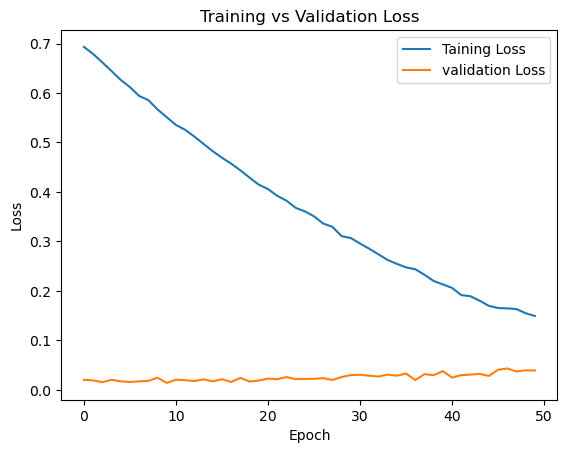

In [12]:
##TODO: Plot the training losses and validation losses
fig, ax = plt.subplots()

ax.plot(loss_list,label = "Taining Loss")
ax.plot(loss_list_val,label = "validation Loss")
        
ax.set_xlabel("Epoch")
ax.set_ylabel("Loss")
ax.set_title("Training vs Validation Loss")
ax.legend()

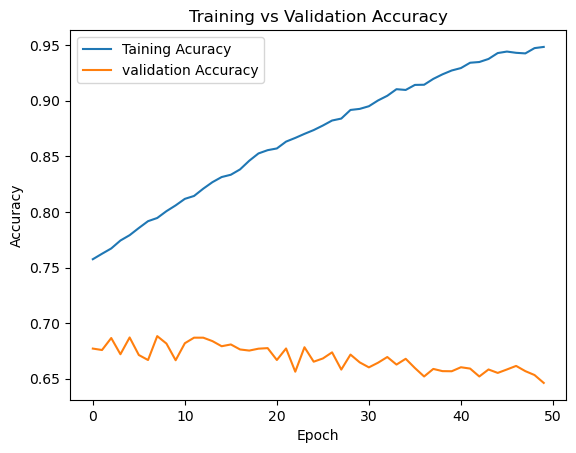

In [13]:
##TODO: Plot the training accuracies and validation accuracies
fig, ax = plt.subplots()

ax.plot(acc_list,label = "Taining Acuracy")
ax.plot(acc_list_val,label = "validation Accuracy")
        
ax.set_xlabel("Epoch")
ax.set_ylabel("Accuracy")
ax.set_title("Training vs Validation Accuracy")
ax.legend()

Based on the plots, it is clear that the model is over fitting. It appears that the validation accuracy is remaining constant while the accuracy is improving. As such, it must be over fitting

## 5.3

In [19]:
#Test
true_labels = []
predictions = []
correct_test = 0
net.eval()
with torch.no_grad():
    for batch_idx, (data, label) in enumerate(test_loader):
        data, label = data.to(device), label.to(device)
        ##TODO: pass the data into the network and store the output
        outputs = net(data)
        
        ##TODO: Get the prediction from the output
        _,predicted = torch.max(outputs,1)
        predicted_class = classes[predicted.item()]

        ##TODO: Calculate the correct number and add the number to correct_test
        true_label = classes[label.item()]
        correct_test += (predicted == label).sum().item()

        ##TODO: update predictions list and true label list
        predictions.append(predicted_class)
        true_labels.append(true_label)
        ##We can directly append the value because here batch_size=1


print('Accuracy on the 10000 test images: %.2f %%' % (100 * correct_test / len(test_set)))

Accuracy on the 10000 test images: 64.34 %


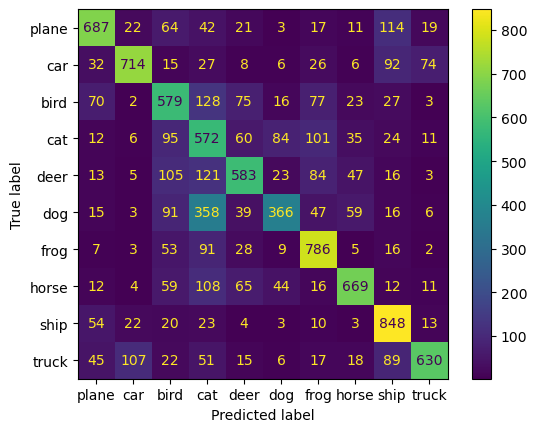

In [21]:
from sklearn.metrics import ConfusionMatrixDisplay
##TODO: print the confusion matrix of test set
##You can use sklearn.metrics.confusion_matrix

#confusion_matrix(true_labels,predictions,labels=classes)

ConfusionMatrixDisplay.from_predictions(true_labels,predictions,labels=classes,display_labels=classes)
plt.show()

It appears that cat and dog were the two labels that were most confused. This makes sense as they look the most similar compared to all of the other classes